In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from qbitmap import hw
from qbitmap import calibration_data
from qbitmap import metrics
from qbitmap import circuits
import cirq

In [6]:
assert hw.PROCESSOR_ID == "rainbow"
# query the noise graph from the desired processor
TIMESTAMP = 1628415068308
target_calibration = hw.PROCESSOR.get_calibration(TIMESTAMP // 1000)

# Target specifically these metrics
calibration = calibration_data.CalibrationWrapper(
    calibration_dct=target_calibration,
    qubits=hw.DEVICE.qubits,
    metric_1q="single_qubit_rb_average_error_per_gate",
    metric_2q="two_qubit_sqrt_iswap_gate_xeb_average_error_per_cycle",
)
noise_graph = calibration.noise_graph

template_qubits = cirq.GridQubit.rect(1, 8)
n_qubits = len(template_qubits)
structured_circuit = circuits.ghz_circuit_line_topology_halfdepth(template_qubits, measure=False, native=True)

PROJECT ID: fermilab-quantum
PROCESSOR:  >>> rainbow <<<
GATESET:    <cirq_google.serializable_gate_set.SerializableGateSet object at 0x7feb3dfe7748>


In [7]:
print(target_calibration)

Calibration(keys=['parallel_p00_error', 'parallel_p11_error', 'single_qubit_idle_t1_micros', 'single_qubit_p00_error', 'single_qubit_p11_error', 'single_qubit_rb_average_error_per_gate', 'single_qubit_rb_incoherent_error_per_gate', 'single_qubit_rb_pauli_error_per_gate', 'single_qubit_readout_separation_error', 'two_qubit_parallel_sqrt_iswap_gate_xeb_average_error_per_cycle', 'two_qubit_parallel_sqrt_iswap_gate_xeb_incoherent_error_per_cycle', 'two_qubit_parallel_sqrt_iswap_gate_xeb_pauli_error_per_cycle', 'two_qubit_parallel_sycamore_gate_xeb_average_error_per_cycle', 'two_qubit_parallel_sycamore_gate_xeb_incoherent_error_per_cycle', 'two_qubit_parallel_sycamore_gate_xeb_pauli_error_per_cycle', 'two_qubit_sqrt_iswap_gate_xeb_average_error_per_cycle', 'two_qubit_sqrt_iswap_gate_xeb_incoherent_error_per_cycle', 'two_qubit_sqrt_iswap_gate_xeb_pauli_error_per_cycle', 'two_qubit_sycamore_gate_xeb_average_error_per_cycle', 'two_qubit_sycamore_gate_xeb_incoherent_error_per_cycle', 'two_qubit

In [15]:
import json

s = cirq.to_json(target_calibration, "test_calibration")
s = cirq.read_json("test_calibration")

In [19]:
calibration = calibration_data.CalibrationWrapper(
    calibration_dct=s,
    qubits=hw.DEVICE.qubits,
    metric_1q="single_qubit_rb_average_error_per_gate",
    metric_2q="two_qubit_sqrt_iswap_gate_xeb_average_error_per_cycle",
)
noise_graph = calibration.noise_graph

template_qubits = cirq.GridQubit.rect(1, 8)
n_qubits = len(template_qubits)
structured_circuit = circuits.ghz_circuit_line_topology_halfdepth(template_qubits, measure=False, native=True)

In [22]:
import matplotlib.pyplot as plt

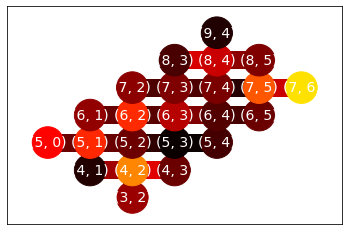

In [25]:
fig, ax = plt.subplots()
calibration.plot_noise_graph(ax=ax)
print()